# 1.Download dataset file. Extract it and store in 'dataset' directory.




In [1]:
! wget https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
! unzip traffic-signs-data.zip
! mkdir data
! mv *.p data/
! rm traffic-signs-data.zip
! mkdir output
! mkdir output/tensorboard

--2018-10-13 05:23:02--  https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
Resolving d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)... 52.84.225.99, 52.84.225.8, 52.84.225.13, ...
Connecting to d17h27t6h515a5.cloudfront.net (d17h27t6h515a5.cloudfront.net)|52.84.225.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123524425 (118M) [application/zip]
Saving to: ‘traffic-signs-data.zip’

traffic-signs-data. 100%[===================>] 117.80M  52.1MB/s    in 2.3s    

2018-10-13 05:23:06 (52.1 MB/s) - ‘traffic-signs-data.zip’ saved [123524425/123524425]

Archive:  traffic-signs-data.zip
  inflating: test.p                  
  inflating: train.p                 
  inflating: valid.p                 


# 2. Load and count pickled data:

In [2]:
import pickle

#File names
training_name = "data/train.p"
validation_name= "data/valid.p"
testing_name = "data/test.p"

#Load from file to variable
with open(testing_name, mode='rb') as f:
    tst = pickle.load(f)
with open(training_name, mode='rb') as f:
    trn = pickle.load(f)
with open(validation_name, mode='rb') as f:
    vld = pickle.load(f)

#Load features to X and labels to Y
X_tst, Y_tst = tst['features'], tst['labels']
X_trn, Y_trn = trn['features'], trn['labels']
X_vld, Y_vld = vld['features'], vld['labels']

# print(X_trn.shape)
# print(Y_trn.shape)


train_number = X_trn.shape[0]
validation_number = X_vld.shape[0]
test_number = X_tst.shape[0]
image_dimension = X_trn.shape[1:]
classes_number = len(set(Y_trn))
print("Training set : ", train_number)
print("Testing set : ", test_number)
print("Validation set : ", validation_number)
print("Image data dimensions : ", image_dimension)
print("Classes : ", classes_number)




Training set :  34799
Testing set :  12630
Validation set :  4410
Image data dimensions :  (32, 32, 3)
Classes :  43


Prepare dict to convert ids to labels

In [0]:
id_label = {0: 'Speed limit (20km/h)', 
              1: 'Speed limit (30km/h)', 
              2: 'Speed limit (50km/h)', 
              3: 'Speed limit (60km/h)', 
              4: 'Speed limit (70km/h)', 
              5: 'Speed limit (80km/h)', 
              6: 'End of speed limit (80km/h)', 
              7: 'Speed limit (100km/h)', 
              8: 'Speed limit (120km/h)', 
              9: 'No passing', 
              10: 'No passing for vehicles over 3.5 metric tons', 
              11: 'Right-of-way at the next intersection', 
              12: 'Priority road', 
              13: 'Yield', 
              14: 'Stop', 
              15: 'No vehicles', 
              16: 'Vehicles over 3.5 metric tons prohibited', 
              17: 'No entry', 
              18: 'General caution', 
              19: 'Dangerous curve to the left', 
              20: 'Dangerous curve to the right',
              21: 'Double curve', 
              22: 'Bumpy road',
              23: 'Slippery road',
              24: 'Road narrows on the right', 
              25: 'Road work', 
              26: 'Traffic signals', 
              27: 'Pedestrians', 
              28: 'Children crossing', 
              29: 'Bicycles crossing', 
              30: 'Beware of ice/snow', 
              31: 'Wild animals crossing', 
              32: 'End of all speed and passing limits', 
              33: 'Turn right ahead', 
              34: 'Turn left ahead', 
              35: 'Ahead only', 
              36: 'Go straight or right', 
              37: 'Go straight or left',
              38: 'Keep right', 
              39: 'Keep left', 
              40: 'Roundabout mandatory', 
              41: 'End of no passing',
              42: 'End of no passing by vehicles over 3.5 metric tons'}

# **3. Explore and visualize data**

Using TensorFlow backend.


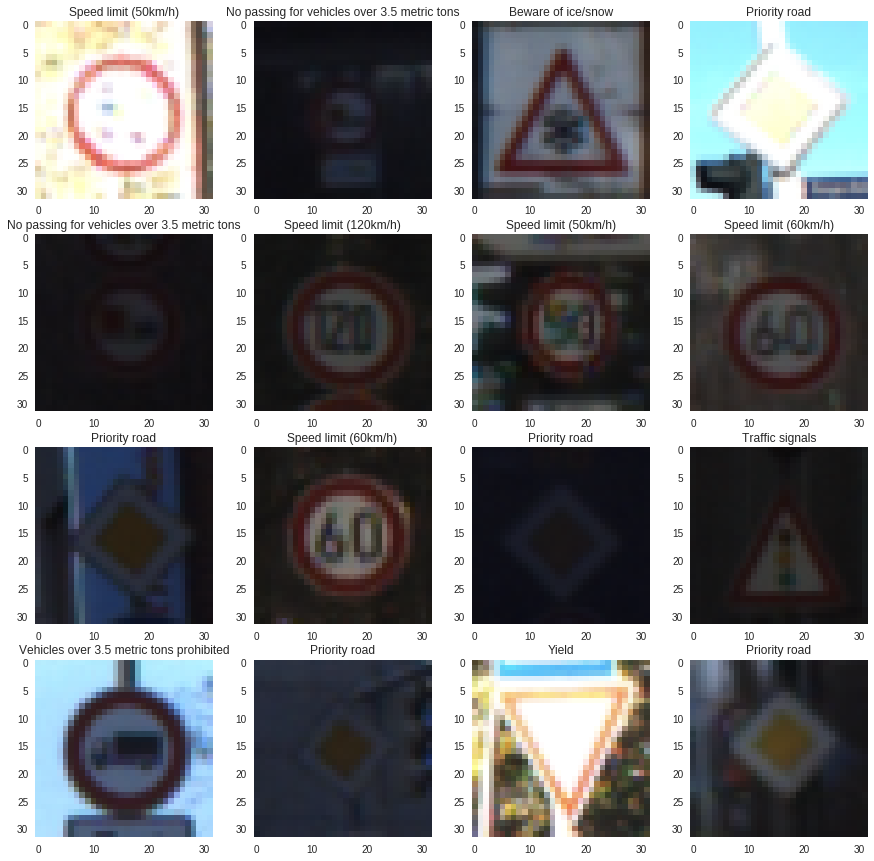

In [4]:
import numpy as np
import random
import tensorflow as tf
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Configure maplotlib to show visualizations in the notebook.
%matplotlib inline

block = 4
#Get random indexes from train set list
random_index_list = [random.randint(0, X_trn.shape[0]) for _ in range(block * block)]
#Prepare and plot images
fig = plt.figure(figsize=(15, 15))
plt.rcParams["axes.grid"] = False

for i, index in enumerate(random_index_list):
    a=fig.add_subplot(block, block, i+1)
    imgplot = plt.imshow(X_trn[index])
    a.set_title('%s' % id_label[Y_trn[index]])
    
plt.show()



Preprocess data:

In [0]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#  I used keras only for the ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator


X_train = X_trn / 255
X_valid = X_vld / 255
X_test = X_tst / 255

In [0]:
def preprocessing_function(img):
    """
        Custom preprocessing_function
    """
    img = img * 255
    img = Image.fromarray(img.astype('uint8'), 'RGB')
    img = ImageEnhance.Brightness(img).enhance(random.uniform(0.6, 1.5))
    img = ImageEnhance.Contrast(img).enhance(random.uniform(0.6, 1.5))

    return np.array(img) / 255

train_datagen = ImageDataGenerator()
train_datagen_augmented = ImageDataGenerator(
    rotation_range=0,
    shear_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,
    preprocessing_function=preprocessing_function)
inference_datagen = ImageDataGenerator()
train_datagen.fit(X_train)
train_datagen_augmented.fit(X_train)
inference_datagen.fit(X_valid)
inference_datagen.fit(X_test)

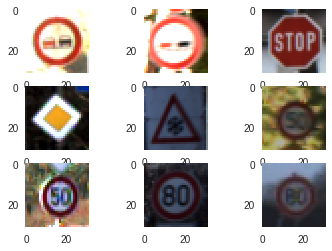

In [7]:
fig = plt.figure()

n = 0

graph_size = 3

for x_batch, y_batch in train_datagen_augmented.flow(X_train, Y_trn, batch_size=1):
    a=fig.add_subplot(graph_size, graph_size, n+1)
    imgplot = plt.imshow(x_batch[0])
    n = n + 1
    if n > 8:
        break

    
plt.show()

# 4. Code for capsule network

In [0]:
import numpy as np
import tensorflow as tf
import numpy as np
bias = 0.00001

def conv_caps_layer(_layer, cap_size, nb_filters, kernel, stride=2):   
    caps = tf.contrib.layers.conv2d(_layer, nb_filters * cap_size, kernel, stride, padding="VALID")    
    shape = caps.get_shape().as_list()
    caps = tf.reshape(caps, shape=(-1, np.prod(shape[1:3]) * nb_filters, cap_size, 1))
    return squash(caps)

def routing(Ucircumflexus, Bij, nb_capsules, nb_capsules_p, iterations=4):

    # Start the routing algorithm
    for iteration in range(iterations):
        with tf.variable_scope('routing_' + str(iteration)):
            # Line 4 of algo           
            Cij = tf.nn.softmax(Bij, dim=2)

            # Line 5 of algo            
            Sj = tf.multiply(Cij, Ucircumflexus)            
            Sj = tf.reduce_sum(Sj, axis=1, keepdims=True)
            
            # line 6:            
            Vj = squash(Sj)
            
            # line 7:            
            Vj_tiled = tf.tile(Vj, [1, nb_capsules_p, 1, 1, 1])            
            U_mul_V = tf.matmul(Ucircumflexus, Vj_tiled, transpose_a=True)            
            Bij += tf.reduce_sum(U_mul_V, axis=0, keepdims=True)
            

    return tf.squeeze(Vj, axis=1)

def fully_connected_caps_layer(_layer, cap_size, nb_capsules, iterations=4):

    shape = _layer.get_shape().as_list()
    len_Ui = np.prod(shape[2])
    len_Vj = cap_size

    nb_capsules_p = np.prod(shape[1])

    _init = tf.random_normal_initializer(stddev=0.01, seed=0)
    _shape = (nb_capsules_p, nb_capsules, len_Vj, len_Ui)
    Wij = tf.get_variable('weight', shape=_shape, dtype=tf.float32, initializer=_init)

    _layer = tf.reshape(_layer, shape=(-1, nb_capsules_p, 1, len_Ui, 1))
    _layer = tf.tile(_layer, [1, 1, nb_capsules, 1, 1])

    Ucircumflexus = tf.einsum('abdc,iabcf->iabdf', Wij, _layer)

    Bij = tf.zeros(shape=[nb_capsules_p, nb_capsules, 1, 1], dtype=np.float32)

    return routing(Ucircumflexus, Bij, nb_capsules, nb_capsules_p, iterations=iterations)

def squash(vector):

    vector += bias # Workaround for the squashing function ...
    norm = tf.reduce_sum(tf.square(vector), -2, keep_dims=True)
    scalar_factor = norm / (1 + norm) / tf.sqrt(norm)
    vec_squashed = scalar_factor * vector  # element-wise
    return(vec_squashed)

Here is routines added to prepare capsule networks. Objects from library used to store and modify hyperparameters,  init tensorflow session, create and do learning using tensorflow.
This routines were taken from source [2], licensed under Apahe 2.0 license.

Here is important to compare it with implementation [3] and [4] and see differences.


In [0]:
import tensorflow as tf
from collections import Counter
import json
import numpy as np
import time
import pickle
import os

#log = Logger("ModelBase")

class Hyperparameters(object):
    """
        Simple class used to store Hyperparameters
    """
    def __init__(self):
        super(Hyperparameters, self).__init__()
        # List used to store list of hyperparameters name
        self.hyp_list = []

    def set_hyp(self, hyp):
        """
            Method used to store hyperparameters inside this class
            **input: **
                *hyp (Dict) Dictionary storing all hyperparameters values
        """
        for key in hyp:
            self.hyp_list.append(key)
            setattr(self, key, hyp[key])

class ModelBase(object):
    """
        Base Model Class
    """

    #  Hyp : Hyperparameters
    DEFAULT_OUTPUT = "output"
    DEFAULT_CHECKPOINT_FOLDER = "checkpoints"

    def __init__(self, model_name, hyperparameters_name=None, hyperparameters_content=None, output_folder=None):
        """
            **input:
                *hyperparameters_name: [Optional] (String|None) Path to the hyperparameters file
                                       By default: hyperparameters.json
                *model_name: (Integer) Name of this model
        """
        #super(ModelBase, self).__init__()

        
        self.output_folder = output_folder        
        self.checkpoints_folder = os.path.join(self.output_folder, self.DEFAULT_CHECKPOINT_FOLDER)
        
        hyp_content = {
            "conv_1_size": 9,
            "conv_1_nb": 256,
            "conv_2_size": 6,
            "conv_2_nb": 64,
            "conv_2_dropout": 0.7,
            "caps_1_vec_len": 16,
            "caps_1_size": 5,
            "caps_1_nb_filter": 16,
            "caps_2_vec_len": 32,
            "learning_rate": 0.0001,
            "routing_steps": 1
        }
        # Set hyperparameters
        self.h = Hyperparameters()
        self.h.set_hyp(hyp_content)
        # Set model names
        self.name = model_name
        self.model_name = model_name
        self._set_hyperparameters_name()
        # Since hyperparameters had changed, we need to set again each name
        self._set_names()

    def _create_conv(self, prev, shape, padding='VALID', strides=[1, 1, 1, 1], relu=False,
                     max_pooling=False, mp_ksize=[1, 2, 2, 1], mp_strides=[1, 2, 2, 1]):
        """
            Create a convolutional layer with relu and/or max pooling(Optional)
        """
        conv_w = tf.Variable(tf.truncated_normal(shape=shape, mean = 0, stddev = 0.1,  seed=0))
        conv_b = tf.Variable(tf.zeros(shape[-1]))
        conv   = tf.nn.conv2d(prev, conv_w, strides=strides, padding=padding) + conv_b

        if relu:
            conv = tf.nn.relu(conv)

        if max_pooling:
            conv = tf.nn.max_pool(conv, ksize=mp_ksize, strides=mp_strides, padding='VALID')

        return conv

    def _fc(self, prev, input_size, output_size, relu=False, sigmoid=False, no_bias=False,
            softmax=False):
        """
            Create fully connecter layer with relu(Optional)
        """
        fc_w = tf.Variable(
            tf.truncated_normal(shape=(input_size, output_size), mean = 0., stddev = 0.1))
        fc_b = tf.Variable(tf.zeros(output_size))
        pre_activation = tf.matmul(prev, fc_w)
        activation = None

        if not no_bias:
            pre_activation = pre_activation + fc_b
        if relu:
            activation = tf.nn.relu(pre_activation)
        if sigmoid:
            activation = tf.nn.sigmoid(pre_activation)
        if softmax:
            activation = tf.nn.softmax(pre_activation)

        if activation is None:
            activation = pre_activation

        return activation, pre_activation

    def init_session(self):
        """
            Init tensorflow session
            A saver property is create at the same time
        """
        #  Create session
        self.saver = tf.train.Saver()
        self.sess = tf.Session()
        # Init variables
        self.sess.run(tf.global_variables_initializer())
        # Tensorboard
        self.tf_tensorboard = tf.summary.merge_all()
        train_log_name = os.path.join(
            os.path.join(self.output_folder, "tensorboard"), self.name, self.sub_train_log_name)
        test_log_name = os.path.join(
            os.path.join(self.output_folder, "tensorboard"), self.name, self.sub_test_log_name)
        self.train_writer = tf.summary.FileWriter(train_log_name, self.sess.graph)
        self.test_writer = tf.summary.FileWriter(test_log_name)
        self.train_writer_it = 0
        self.test_writer_it = 0

        # Backup tensors
        backup_tensors = {}
        for field in dir(self):
            if "tf_" in field and field.index("tf_") == 0:
                backup_tensors[field] = getattr(self, field).name
        tf.constant(json.dumps(backup_tensors), dtype=tf.string, name="model_base_tensors_backup")
        # Backup hyperparameters
        backup_hyp = {}
        for field in self.h.hyp_list:
            value = getattr(self.h, field)
            d_type = tf.int32 if isinstance(value, int) else tf.float32
            n_cst = tf.constant(value, dtype=d_type, name="hyp/%s" % field)
            backup_hyp[field] = n_cst.name
        tf.constant(json.dumps(backup_hyp), dtype=tf.string, name="model_base_hyp_backup")

    def get_equal_batches(self, data, labels, batch_size):
        """
            This method will return a generator class which could be used to
            get new batches with the same number of rows for each class
            **input:**
                *batch_size (int) Size of each batch
             **return (Python Generator of Batch class)**
        """
        labels = np.array(labels)

        indexs = np.arange(len(data))
        np.random.shuffle(indexs)

        data = data[indexs]
        labels = labels[indexs]

        max_size = Counter(labels).most_common()[-1][1]
        unique_label = np.array(list(set(labels)))
        nb_classes = len(unique_label)

        if batch_size > max_size:
            batch_size = max_size

        batch_per_class = batch_size // nb_classes
        iterations = max_size // batch_per_class

        for it in range(iterations):

            indexes = []

            for label in unique_label:
                n_indexes = np.where(labels==label)[0][it * batch_per_class: (it + 1) * batch_per_class]
                n_indexes = n_indexes.tolist()
                indexes += n_indexes

            indexes = np.array(indexes)

            x = data[indexes]
            y = labels[indexes]

            yield x, y


    def get_batches(self, data_list, batch_size, shuffle=True):
        """
            This method will return a generator class which could be used to
            get new batches.
            **input:**
                *batch_size (int) Size of each batch
             **return (Python Generator of Batch class)**
        """
        if shuffle:
            indexs = np.arange(len(data_list[0]))
            np.random.shuffle(indexs)

            for d, data in enumerate(data_list):
                data_list[d] = np.array(data_list[d])
                data_list[d] = data_list[d][indexs]

        iterations = len(data_list[0]) // batch_size
        for iteration in range(iterations):
            yield (dt[iteration * batch_size: (iteration + 1) * batch_size] for dt in data_list)

    def save(self, name=None):
        """
            Save the model
        """
        #log.info("Saving model ...")

        if name is None:
            name = self.model_name

        if not os.path.exists(self.checkpoints_folder):
            os.makedirs(self.checkpoints_folder)

        save_path = self.saver.save(
            self.sess, os.path.join(self.checkpoints_folder, name))

        #log.info("Model successfully saved here: %s" % save_path)

    def _set_hyperparameters_name(self):
        """
            Convert hyperparameters dict to a string
            This string will be used to set the models names
        """
        # Generate a little name for each hyperparameters
        hyperparameters_names = [("".join([p[0] for p in hyp.split("_")]), getattr(self.h, hyp))
                                 for hyp in self.h.hyp_list]
        self.hyperparameters_name = ""
        for index_hyperparameter, hyperparameter in enumerate(hyperparameters_names):
            short_name, value = hyperparameter
            prepend = "" if index_hyperparameter == 0 else "_"
            self.hyperparameters_name += "%s%s_%s" % (prepend, short_name, value)

    def _set_names(self):
        """
            Set all model names
        """
        name_time = "%s--%s" % (self.model_name, time.time())
        # model_name is used to set the ckpt name
        self.model_name = "%s--%s" % (self.hyperparameters_name, name_time)
        # sub_train_log_name is used to set the name of the training part in tensorboard
        self.sub_train_log_name = "%s-train--%s" % (self.hyperparameters_name, name_time)
        # sub_test_log_name is used to set the name of the testing part in tensorboard
        self.sub_test_log_name = "%s-test--%s" % (self.hyperparameters_name, name_time)

    def dump_batch(self, folder, data):
        """
            Save batches
            Mainly used for Reinforcement Learning
        """
        folder = os.path.join(os.path.dirname(os.path.abspath(__file__)), folder)
        # Create folder if not exist
        if not os.path.exists(folder):
            os.makedirs(folder)

        pickle.dump(data, open(os.path.join(folder, str(time.time())), "wb" ))


    def load(self, ckpt):
        """
            Load a model
        """
        #log.info("Loading ckpt ...")
        #loaded_graph = tf.Graph()
        #tf.reset_default_graph()
        #g = tf.Graph()
        #with g.as_default():
        self.sess = tf.Session()
        # Load the graph
        loader = tf.train.import_meta_graph(ckpt + '.meta')
        loader.restore(self.sess, ckpt)

        g = tf.get_default_graph()

        # Search for the backup tensor
        tensor_names = [
            n.name for n in g.as_graph_def().node if "model_base_tensors_backup" in n.name]

        # Search for the backup hyp
        hyp_names = [
            n.name for n in g.as_graph_def().node if "model_base_hyp_backup" in n.name]

        # Get the tensor string
        #tensors = g.get_tensor_by_name(names[0])
        tensors = g.get_operation_by_name(tensor_names[0]).outputs
        hyps = g.get_operation_by_name(hyp_names[0]).outputs

        #self.sess.run(tf.global_variables_initializer())

        tensors = self.sess.run(tensors)[0]
        tensors = json.loads(tensors)
        for tensor in tensors:
            try:
                n_tensor = g.get_tensor_by_name(tensors[tensor])
            except Exception as e:
                n_tensor = g.get_operation_by_name(tensors[tensor])
            setattr(self, tensor, n_tensor)

        hyps = self.sess.run(hyps)[0]
        hyps = json.loads(hyps)
        for hyp in hyps:
            n_hyp = g.get_tensor_by_name(hyps[hyp])
            setattr(self.h, hyp, self.sess.run(n_hyp))

        #log.info("Ckpt ready")

        # Tensorboard
        self.tf_tensorboard = tf.summary.merge_all()
        train_log_name = os.path.join(
            os.path.join(self.output_folder, "tensorboard"), self.name, self.sub_train_log_name)
        test_log_name = os.path.join(
            os.path.join(self.output_folder, "tensorboard"), self.name, self.sub_test_log_name)
        self.train_writer = tf.summary.FileWriter(train_log_name, self.sess.graph)
        self.test_writer = tf.summary.FileWriter(test_log_name)
        self.train_writer_it = 0
        self.test_writer_it = 0

        self.model_name = ckpt.split("/")[-1]
        self.saver = tf.train.Saver()

In [0]:
import numpy as np
import tensorflow as tf

class ModelTrafficSign(ModelBase):
    """
        ModelTrafficSign.
        This class is used to create the conv graph using:
            Dynamic Routing Between Capsules
    """

    # Numbers of label to predict
    NB_LABELS = 43

    def __init__(self, model_name, output_folder):
        """
            **input:
                *model_name: (Integer) Name of this model
                *output_folder: Output folder to saved data (tensorboard, checkpoints)
        """
        ModelBase.__init__(self, model_name, output_folder=output_folder)

    def _build_inputs(self):
        """
            Build tensorflow inputs
            (Placeholder)
            **return: **
                *tf_images: Images Placeholder
                *tf_labels: Labels Placeholder
        """
        # Images 32*32*3
        tf_images = tf.placeholder(tf.float32, [None, 32, 32, 3], name='images')
        # Labels: [0, 1, 6, 20, ...]
        tf_labels = tf.placeholder(tf.int64, [None], name='labels')
        return tf_images, tf_labels

    def _build_main_network(self, images, conv_2_dropout):
        """
            This method is used to create the two convolutions and the CapsNet on the top
            **input:
                *images: Image PLaceholder
                *conv_2_dropout: Dropout value placeholder
            **return: **
                *Caps1: Output of first Capsule layer
                *Caps2: Output of second Capsule layer
        """
        # First BLock:
        # Layer 1: Convolution.
        shape = (self.h.conv_1_size, self.h.conv_1_size, 3, self.h.conv_1_nb)
        conv1 = self._create_conv(self.tf_images, shape, relu=True, max_pooling=False, padding='VALID')
        # Layer 2: Convolution.
        #shape = (self.h.conv_2_size, self.h.conv_2_size, self.h.conv_1_nb, self.h.conv_2_nb)
        #conv2 = self._create_conv(conv1, shape, relu=True, max_pooling=False, padding='VALID')
        conv1 = tf.nn.dropout(conv1, keep_prob=conv_2_dropout)

        # Create the first capsules layer
        caps1 = conv_caps_layer(
            _layer=conv1,
            cap_size=self.h.caps_1_vec_len,
            nb_filters=self.h.caps_1_nb_filter,
            kernel=self.h.caps_1_size)
        # Create the second capsules layer used to predict the output
        caps2 = fully_connected_caps_layer(
            _layer=caps1,
            cap_size=self.h.caps_2_vec_len,
            nb_capsules=self.NB_LABELS,
            iterations=self.h.routing_steps)

        return caps1, caps2

    def _build_decoder(self, caps2, one_hot_labels, batch_size):
        """
            Build the decoder part from the last capsule layer
            **input:
                *Caps2:  Output of second Capsule layer
                *one_hot_labels
                *batch_size
        """
        labels = tf.reshape(one_hot_labels, (-1, self.NB_LABELS, 1))
        # squeeze(caps2):   [?, len_v_j,    capsules_nb]
        # labels:           [?, NB_LABELS,  1] with capsules_nb == NB_LABELS
        mask = tf.matmul(tf.squeeze(caps2), labels, transpose_a=True)
        # Select the good capsule vector
        capsule_vector = tf.reshape(mask, shape=(batch_size, self.h.caps_2_vec_len))
        # capsule_vector: [?, len_v_j]

        # Reconstruct image
        fc1 = tf.contrib.layers.fully_connected(capsule_vector, num_outputs=400)
        fc1 = tf.reshape(fc1, shape=(batch_size, 5, 5, 16))
        upsample1 = tf.image.resize_nearest_neighbor(fc1, (8, 8))
        conv1 = tf.layers.conv2d(upsample1, 4, (3,3), padding='same', activation=tf.nn.relu)

        upsample2 = tf.image.resize_nearest_neighbor(conv1, (16, 16))
        conv2 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)

        upsample3 = tf.image.resize_nearest_neighbor(conv2, (32, 32))
        conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)

        # 3 channel for RGG
        logits = tf.layers.conv2d(conv6, 3, (3,3), padding='same', activation=None)
        decoded = tf.nn.sigmoid(logits, name='decoded')
        tf.summary.image('reconstruction_img', decoded)

        return decoded

    def init(self):
        """
            Init the graph
        """
        # Get graph inputs
        self.tf_images, self.tf_labels = self._build_inputs()
        # Dropout inputs
        self.tf_conv_2_dropout = tf.placeholder(tf.float32, shape=(), name='conv_2_dropout')
        # Dynamic batch size
        batch_size = tf.shape(self.tf_images)[0]
        # Translate labels to one hot array
        one_hot_labels = tf.one_hot(self.tf_labels, depth=self.NB_LABELS)
        # Create the first convolution and the CapsNet
        self.tf_caps1, self.tf_caps2 = self._build_main_network(self.tf_images, self.tf_conv_2_dropout)

        # Build the images reconstruction
        self.tf_decoded = self._build_decoder(self.tf_caps2, one_hot_labels, batch_size)

        # Build the loss
        _loss = self._build_loss(
            self.tf_caps2, one_hot_labels, self.tf_labels, self.tf_decoded, self.tf_images)
        (self.tf_loss_squared_rec, self.tf_margin_loss_sum, self.tf_predicted_class,
         self.tf_correct_prediction, self.tf_accuracy, self.tf_loss, self.tf_margin_loss,
         self.tf_reconstruction_loss) = _loss

        # Build optimizer
        optimizer = tf.train.AdamOptimizer(learning_rate=self.h.learning_rate)
        self.tf_optimizer = optimizer.minimize(self.tf_loss, global_step=tf.Variable(0, trainable=False))

        # Log value into tensorboard
        tf.summary.scalar('margin_loss', self.tf_margin_loss)
        tf.summary.scalar('accuracy', self.tf_accuracy)
        tf.summary.scalar('total_loss', self.tf_loss)
        tf.summary.scalar('reconstruction_loss', self.tf_reconstruction_loss)

        self.tf_test = tf.random_uniform([2], minval=0, maxval=None, dtype=tf.float32, seed=None, name="tf_test")

        self.init_session()


    def _build_loss(self, caps2, one_hot_labels, labels, decoded, images):
        """
            Build the loss of the graph
        """
        # Get the length of each capsule
        capsules_length = tf.sqrt(tf.reduce_sum(tf.square(caps2), axis=2, keep_dims=True))

        max_l = tf.square(tf.maximum(0., 0.9 - capsules_length))
        max_l = tf.reshape(max_l, shape=(-1, self.NB_LABELS))
        max_r = tf.square(tf.maximum(0., capsules_length - 0.1))
        max_r = tf.reshape(max_r, shape=(-1, self.NB_LABELS))
        t_c = one_hot_labels
        m_loss = t_c * max_l + 0.5 * (1 - t_c) * max_r
        margin_loss_sum = tf.reduce_sum(m_loss, axis=1)
        margin_loss = tf.reduce_mean(margin_loss_sum)

        # Reconstruction loss
        loss_squared_rec = tf.square(decoded - images)
        reconstruction_loss = tf.reduce_mean(loss_squared_rec)

        # 3. Total loss
        loss = margin_loss + (0.0005 * reconstruction_loss)

        # Accuracy
        predicted_class = tf.argmax(capsules_length, axis=1)
        predicted_class = tf.reshape(predicted_class, [tf.shape(capsules_length)[0]])
        correct_prediction = tf.equal(predicted_class, labels)
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        return (loss_squared_rec, margin_loss_sum, predicted_class, correct_prediction, accuracy,
                loss, margin_loss, reconstruction_loss)

    def optimize(self, images, labels, tb_save=True):
        """
            Train the model
            **input: **
                *images: Image to train the model on
                *labels: True classes
                *tb_save: (Boolean) Log this optimization in tensorboard
            **return: **
                Loss: The loss of the model on this batch
                Acc: Accuracy of the model on this batch
        """
        tensors = [self.tf_optimizer, self.tf_margin_loss, self.tf_accuracy, self.tf_tensorboard]
        _, loss, acc, summary = self.sess.run(tensors,
            feed_dict={
            self.tf_images: images,
            self.tf_labels: labels,
            self.tf_conv_2_dropout: self.h.conv_2_dropout
        })

        if tb_save:
            # Write data to tensorboard
            self.train_writer.add_summary(summary, self.train_writer_it)
            self.train_writer_it += 1

        return loss, acc

    def evaluate(self, images, labels, tb_train_save=False, tb_test_save=False):
        """
            Evaluate dataset
            **input: **
                *images: Image to train the model on
                *labels: True classes
                *tb_train_save: (Boolean) Log this optimization in tensorboard under the train part
                *tb_test_save: (Boolean) Log this optimization in tensorboard under the test part
            **return: **
                Loss: The loss of the model on this batch
                Acc: Accuracy of the model on this batch
        """
        tensors = [self.tf_margin_loss, self.tf_accuracy, self.tf_tensorboard]
        loss, acc, summary = self.sess.run(tensors,
                feed_dict={
                self.tf_images: images,
                self.tf_labels: labels,
                self.tf_conv_2_dropout: 1.
            })

        if tb_test_save:
            # Write data to tensorboard
            self.test_writer.add_summary(summary, self.test_writer_it)
            self.test_writer_it += 1

        if tb_train_save:
            # Write data to tensorboard
            self.train_writer.add_summary(summary, self.train_writer_it)
            self.train_writer_it += 1

        return loss, acc

    def predict(self, images):
        """
            Method used to predict a class
            Return a softmax
            **input: **
                *images: Image to train the model on
            **return:
                *softmax: Softmax between all capsules
        """
        tensors = [self.tf_caps2]

        caps2 = self.sess.run(tensors,
            feed_dict={
            self.tf_images: images,
            self.tf_conv_2_dropout: 1.
        })[0]

        # tf.sqrt(tf.reduce_sum(tf.square(caps2), axis=2, keep_dims=True))
        caps2 = np.sqrt(np.sum(np.square(caps2), axis=2, keepdims=True))
        caps2 = np.reshape(caps2, (len(images), self.NB_LABELS))
        # softmax
        softmax = np.exp(caps2) / np.sum(np.exp(caps2), axis=1, keepdims=True)

        return softmax

    def reconstruction(self, images, labels):
        """
            Method used to get the reconstructions given a batch
            Return the result as a softmax
            **input: **
                *images: Image to train the model on
                *labels: True classes
        """
        tensors = [self.tf_decoded]

        decoded = self.sess.run(tensors,
            feed_dict={
            self.tf_images: images,
            self.tf_labels: labels,
            self.tf_conv_2_dropout: 1.
        })[0]

        return decoded

    def evaluate_dataset(self, images, labels, batch_size=10):
        """
            Evaluate a full dataset
            This method is used to fully evaluate the dataset batch per batch. Useful when
            the dataset can't be fit inside to the GPU.
            *input: **
                *images: Image to train the model on
                *labels: True classes
            *return: **
                *loss: Loss overall your dataset
                *accuracy: Accuracy overall your dataset
                *predicted_class: Predicted class
        """
        tensors = [self.tf_loss_squared_rec, self.tf_margin_loss_sum, self.tf_correct_prediction,
                   self.tf_predicted_class]

        loss_squared_rec_list = None
        margin_loss_sum_list = None
        correct_prediction_list = None
        predicted_class = None

        b = 0
        for batch in self.get_batches([images, labels], batch_size, shuffle=False):
            images_batch, labels_batch = batch
            loss_squared_rec, margin_loss_sum, correct_prediction, classes = self.sess.run(tensors,
                feed_dict={
                self.tf_images: images_batch,
                self.tf_labels: labels_batch,
                self.tf_conv_2_dropout: 1.
            })
            if loss_squared_rec_list is not None:
                predicted_class = np.concatenate((predicted_class, classes))
                loss_squared_rec_list = np.concatenate((loss_squared_rec_list, loss_squared_rec))
                margin_loss_sum_list = np.concatenate((margin_loss_sum_list, margin_loss_sum))
                correct_prediction_list = np.concatenate((correct_prediction_list, correct_prediction))
            else:
                predicted_class = classes
                loss_squared_rec_list = loss_squared_rec
                margin_loss_sum_list = margin_loss_sum
                correct_prediction_list = correct_prediction
            b += batch_size

        margin_loss = np.mean(margin_loss_sum_list)
        reconstruction_loss = np.mean(loss_squared_rec_list)
        accuracy = np.mean(correct_prediction_list)

        loss = margin_loss

        return loss, accuracy, predicted_class

Model initialization. If something goes wrong after severul runs - just reset computation graph

In [11]:
# Init model
#Workaround for multiply runs in notebook during debug
#tf.reset_default_graph() 

model = ModelTrafficSign("TrafficSign", output_folder="output")
model.init()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
dim is deprecated, use axis instead


In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

BATCH_SIZE = 50

# Utils method to print the current progression
def plot_progression(b, cost, acc, label): print(
    "[%s] Batch ID = %s, loss = %s, acc = %s" % (label, b, cost, acc))

# Training pipeline
b = 0
valid_batch = inference_datagen.flow(X_valid, Y_vld, batch_size=BATCH_SIZE)
best_validation_loss = None
augmented_factor = 0.99
decrease_factor = 0.90
train_batches = train_datagen.flow(X_train, Y_trn, batch_size=BATCH_SIZE)
augmented_train_batches = train_datagen_augmented.flow(X_train, Y_trn, batch_size=BATCH_SIZE)

while True:
    next_batch = next(
        augmented_train_batches if random.uniform(0, 1) < augmented_factor else train_batches)
    x_batch, y_batch = next_batch

    ### Training
    cost, acc = model.optimize(x_batch, y_batch)
    ### Validation
    x_batch, y_batch = next(valid_batch, None)
    # Retrieve the cost and acc on this validation batch and save it in tensorboard
    cost_val, acc_val = model.evaluate(x_batch, y_batch, tb_test_save=True)

    if b % 10 == 0: # Plot the last results
        plot_progression(b, cost, acc, "Train")
        plot_progression(b, cost_val, acc_val, "Validation")
    if b % 1000 == 0: # Test the model on all the validation
        print("Evaluate full validation dataset ...")
        loss, acc, _ = model.evaluate_dataset(X_valid, Y_vld)
        print("Current loss: %s Best loss: %s" % (loss, best_validation_loss))
        plot_progression(b, loss, acc, "TOTAL Validation")
        if best_validation_loss is None or loss < best_validation_loss:
            best_validation_loss = loss
            model.save()
        augmented_factor = augmented_factor * decrease_factor
        print("Augmented Factor = %s" % augmented_factor)

    b += 1

[Train] Batch ID = 0, loss = 4.6824036, acc = 0.06
[Validation] Batch ID = 0, loss = 1.6191723, acc = 0.02
Evaluate full validation dataset ...
Current loss: 1.6563069 Best loss: None
[TOTAL Validation] Batch ID = 0, loss = 1.6563069, acc = 0.026077097505668934
Augmented Factor = 0.891
[Train] Batch ID = 10, loss = 0.78919566, acc = 0.02
[Validation] Batch ID = 10, loss = 0.8095207, acc = 0.0
[Train] Batch ID = 20, loss = 0.79014486, acc = 0.02
[Validation] Batch ID = 20, loss = 0.8080439, acc = 0.02
[Train] Batch ID = 30, loss = 0.70420575, acc = 0.08
[Validation] Batch ID = 30, loss = 0.6934392, acc = 0.16
[Train] Batch ID = 40, loss = 0.6944005, acc = 0.06
[Validation] Batch ID = 40, loss = 0.6955357, acc = 0.12
[Train] Batch ID = 50, loss = 0.6334925, acc = 0.12
[Validation] Batch ID = 50, loss = 0.64712775, acc = 0.1
[Train] Batch ID = 60, loss = 0.60355693, acc = 0.18
[Validation] Batch ID = 60, loss = 0.5970675, acc = 0.22
[Train] Batch ID = 70, loss = 0.5765943, acc = 0.14
[Val

KeyboardInterrupt: ignored

In [16]:
### Load the images from WEB and test here




c1s_9_c1n_256_c2s_6_c2n_64_c2d_0.7_c1vl_16_c1s_5_c1nf_16_c2vl_32_lr_0.0001_rs_1--TrafficSign--1539194721.8965132.data-00000-of-00001
c1s_9_c1n_256_c2s_6_c2n_64_c2d_0.7_c1vl_16_c1s_5_c1nf_16_c2vl_32_lr_0.0001_rs_1--TrafficSign--1539194721.8965132.index
c1s_9_c1n_256_c2s_6_c2n_64_c2d_0.7_c1vl_16_c1s_5_c1nf_16_c2vl_32_lr_0.0001_rs_1--TrafficSign--1539194721.8965132.meta
checkpoint


References:

1.  https://github.com/mohamedameen93/German-Traffic-Sign-Classification-Using-TensorFlow  (Link to implementation of traffic sign recognition using convolution networks (LeNet and VGGNet))
2. Capsule network implementaion, Apache 2.0 licensed: https://github.com/thibo73800/capsnet-traffic-sign-classifier
3. Capsule network implementation PyTorch:
https://github.com/higgsfield/Capsule-Network-Tutorial
4. Capsule network implementation in pyTorch:
https://github.com/gram-ai/capsule-networks
5. Capsule network implementation from co-author of article ""Dynamic Routing between Capsules" by Sara Sabour, Nickolas Frosst, Geoffrey E. Hinton"
